Kutubxonalarni yuklash

In [13]:
#Importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
#Import data and describe it
df = pd.read_csv("./credit_history.csv")
df.describe()

,customer_number,credit_score,num_credit_accounts,oldest_credit_line_age,oldest_account_age_months,total_credit_limit,num_inquiries_6mo,recent_inquiry_count,num_public_records,num_collections,account_diversity_index
count,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.00000,89999.000000
mean,54999.000000,716.281681,9.400016,9.344400,112.132806,91483.424260,1.495183,1.495183,0.072612,0.03120,0.310799
std,25980.617776,46.076985,4.769961,5.111351,61.336214,67988.308788,1.225129,1.225129,0.259500,0.17386,0.100995
min,10000.000000,534.000000,0.000000,0.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.00000,0.001000
25%,32499.500000,685.000000,6.000000,5.400000,64.800000,45100.000000,1.000000,1.000000,0.000000,0.00000,0.240000
50%,54999.000000,717.000000,9.000000,9.000000,108.000000,72300.000000,1.000000,1.000000,0.000000,0.00000,0.309000
75%,77498.500000,748.000000,13.000000,12.900000,154.800000,117800.000000,2.000000,2.000000,0.000000,0.00000,0.380000
max,99998.000000,850.000000,31.000000,32.200000,386.400000,500000.000000,10.000000,10.000000,1.000000,1.00000,0.756000


In [8]:
#Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                89999 non-null  int64  
 1   credit_score               89999 non-null  int64  
 2   num_credit_accounts        89999 non-null  int64  
 3   oldest_credit_line_age     89999 non-null  float64
 4   oldest_account_age_months  89999 non-null  float64
 5   total_credit_limit         89999 non-null  int64  
 6   num_delinquencies_2yrs     89999 non-null  int64  
 7   num_inquiries_6mo          89999 non-null  int64  
 8   recent_inquiry_count       89999 non-null  int64  
 9   num_public_records         89999 non-null  int64  
 10  num_collections            89999 non-null  int64  
 11  account_diversity_index    89999 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 8.2 MB


In [9]:
#rename column - ustun nomini almashtirish
df.rename(columns={"customer_number":"customer_id"},inplace=True)


In [10]:
#find missing values - yo'qolgan malumotlarni qidirish
placeholders = ['NULL', 'NA', 'N/A', 'nan', r'\N']
print("\nCheck Placeholders:\n",(df.isin(placeholders)).sum())
print("\nMissing Values:\n", df.isnull().sum())


Check Placeholders:
 customer_id                  0
credit_score                 0
num_credit_accounts          0
oldest_credit_line_age       0
oldest_account_age_months    0
total_credit_limit           0
num_delinquencies_2yrs       0
num_inquiries_6mo            0
recent_inquiry_count         0
num_public_records           0
num_collections              0
account_diversity_index      0
dtype: int64

Missing Values:
 customer_id                  0
credit_score                 0
num_credit_accounts          0
oldest_credit_line_age       0
oldest_account_age_months    0
total_credit_limit           0
num_delinquencies_2yrs       0
num_inquiries_6mo            0
recent_inquiry_count         0
num_public_records           0
num_collections              0
account_diversity_index      0
dtype: int64


In [ ]:
# Fill missing values with 0
df['num_delinquencies_2yrs'] = df['num_delinquencies_2yrs'].apply(
    lambda x: str(x).replace(r'\N', '0').strip()
)
df['num_delinquencies_2yrs'] = df['num_delinquencies_2yrs'].astype(int)

In [44]:
df.to_csv("credit_history_cleaned.csv", index=False)

In [15]:
newdf = pd.read_csv("credit_history_cleaned.csv")

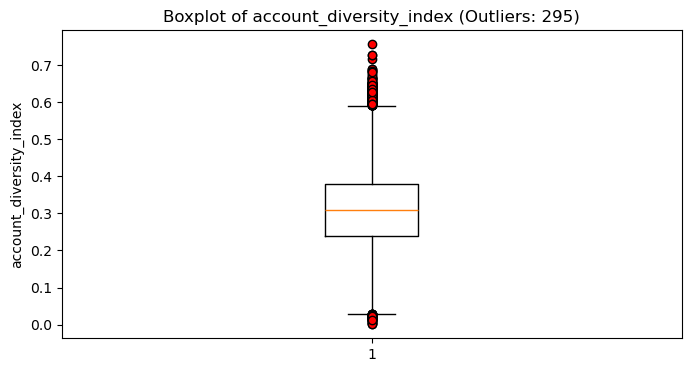

Column: account_diversity_index, Number of outliers: 295


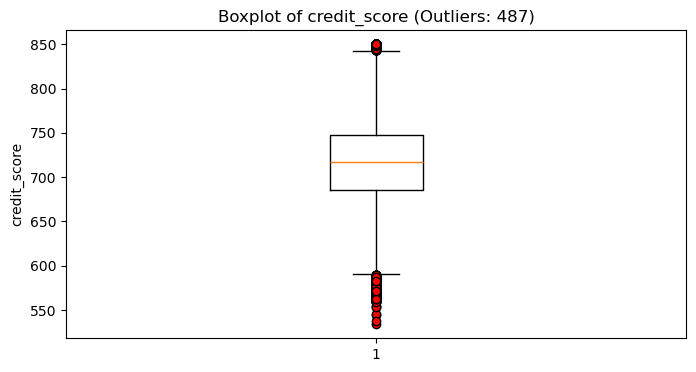

Column: credit_score, Number of outliers: 487


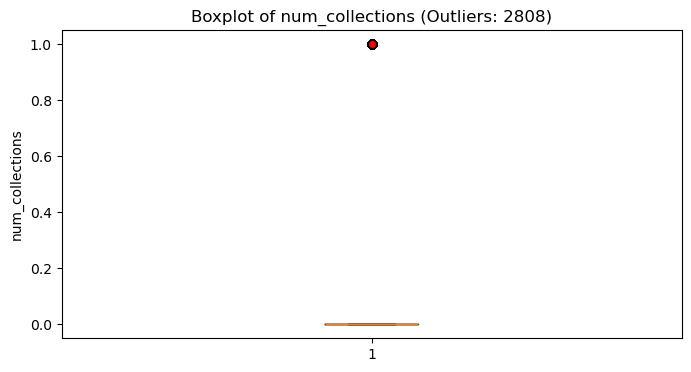

Column: num_collections, Number of outliers: 2808


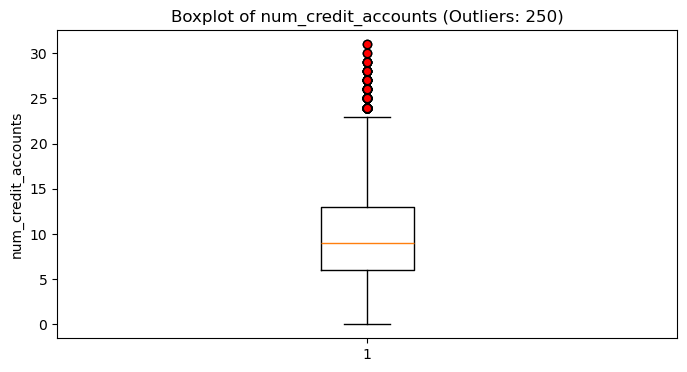

Column: num_credit_accounts, Number of outliers: 250


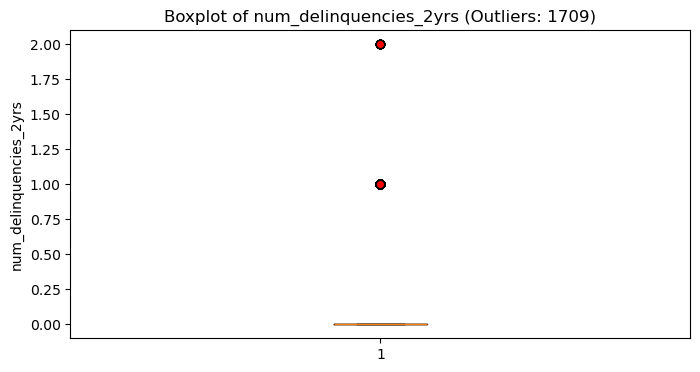

Column: num_delinquencies_2yrs, Number of outliers: 1709


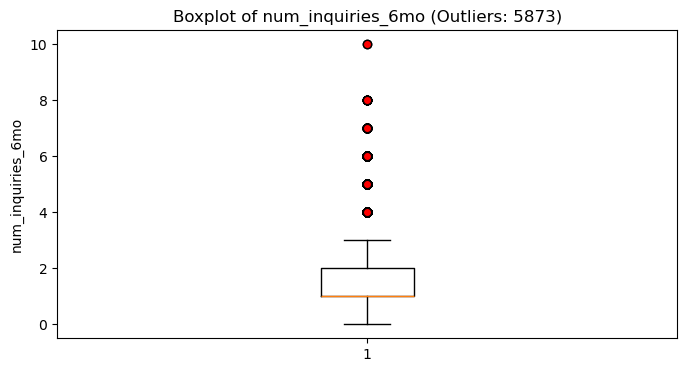

Column: num_inquiries_6mo, Number of outliers: 5873


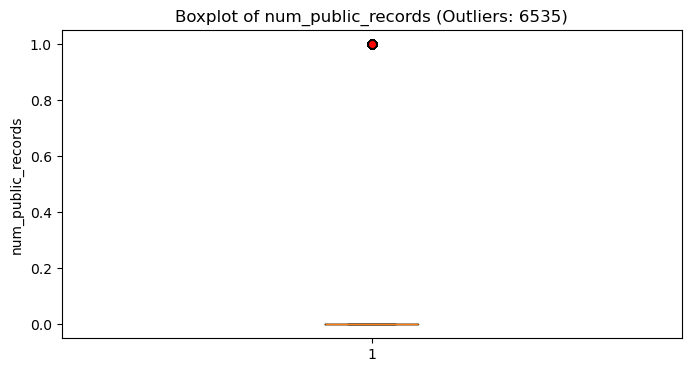

Column: num_public_records, Number of outliers: 6535


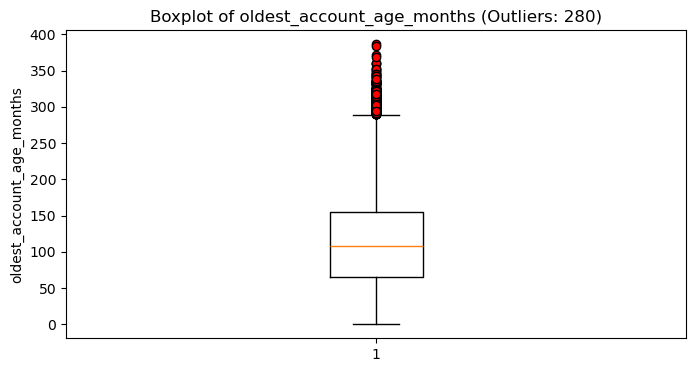

Column: oldest_account_age_months, Number of outliers: 280


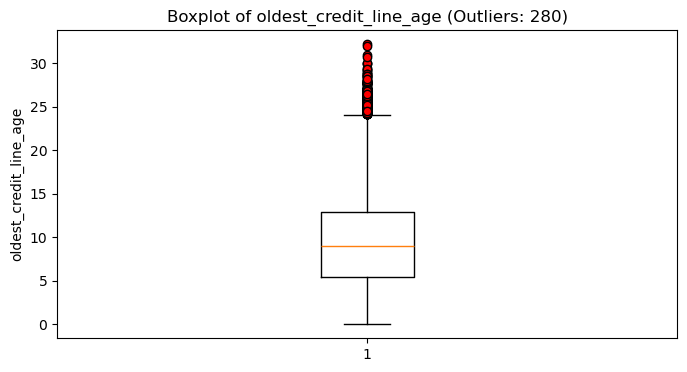

Column: oldest_credit_line_age, Number of outliers: 280


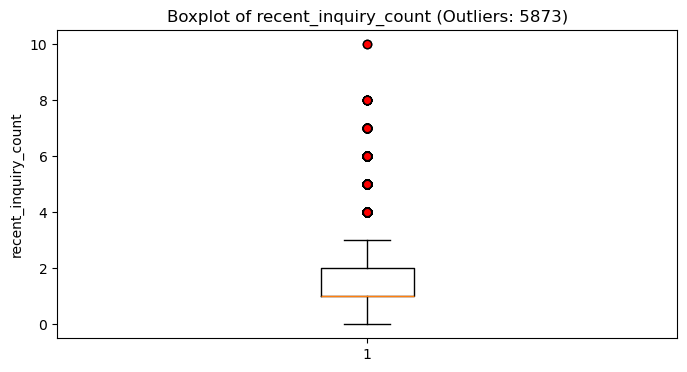

Column: recent_inquiry_count, Number of outliers: 5873


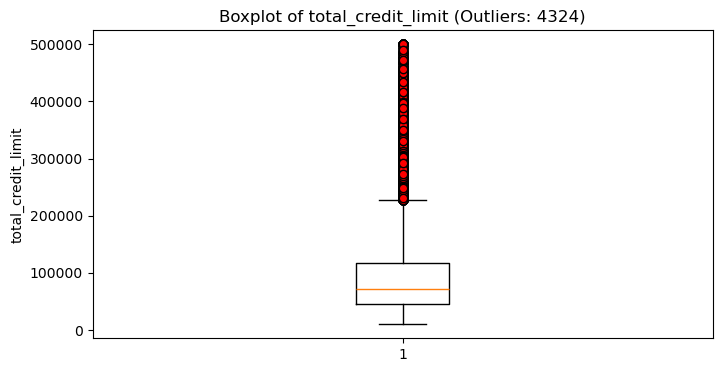

Column: total_credit_limit, Number of outliers: 4324


In [16]:
skip_cols = [col for col in newdf.columns if col.endswith('_id')]
numeric_cols = newdf.select_dtypes(include='number').columns.difference(skip_cols)

for col in numeric_cols:
        Q1 = newdf[col].quantile(0.25)
        Q3 = newdf[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = newdf[(newdf[col] < Q1 - 1.5*IQR) | (newdf[col] > Q3 + 1.5*IQR)][col]
        
        plt.figure(figsize=(8,4))
        plt.boxplot(newdf[col], flierprops=dict(marker='o', markerfacecolor='red', markersize=6))
        plt.title(f'Boxplot of {col} (Outliers: {len(outliers)})')
        plt.ylabel(col)
        plt.show()
        print(f'Column: {col}, Number of outliers: {len(outliers)}')